<a href="https://colab.research.google.com/github/arshambt/MachineLearning2023/blob/main/Midterm/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3:

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron , LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_covtype
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report

X, y = fetch_covtype(return_X_y = True)
print(X.shape, y.shape)

# Count the number of samples in each class
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=93)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)

(581012, 54) (581012,)
Class counts before balancing: {1: 211840, 2: 283301, 3: 35754, 4: 2747, 5: 9493, 6: 17367, 7: 20510}
Class counts after balancing: {1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747}


New balanced dataset shape: (19229, 54) (19229,)


In [87]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size =0.3, shuffle = True, random_state = 93)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(type(x_train))

(13460, 54) (5769, 54) (13460,) (5769,)
<class 'numpy.ndarray'>


In [89]:
model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)

print("Logistic Regression")
print(f"Train accuracy: {s1}")
print(f"Test accuracy: {s2}")

Logistic Regression
Train accuracy: 0.4847696879643388
Test accuracy: 0.49523314265903967


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
model_2 = LogisticRegression(max_iter = 1000, solver='newton-cholesky', random_state = 93)

model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_test)

s1 = model_2.score(x_train, y_train)
s2 = model_2.score(x_test, y_test)

print("Logistic Regression")
print(f"Train accuracy: {s1}")
print(f"Test accuracy: {s2}")

Logistic Regression
Train accuracy: 0.674219910846954
Test accuracy: 0.6760270410816432


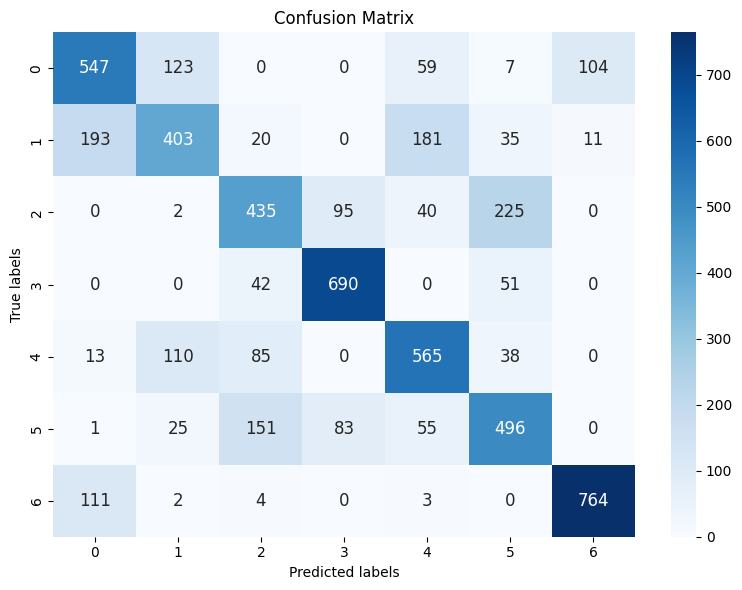

Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       840
           2       0.61      0.48      0.53       843
           3       0.59      0.55      0.57       797
           4       0.79      0.88      0.84       783
           5       0.63      0.70      0.66       811
           6       0.58      0.61      0.60       811
           7       0.87      0.86      0.87       884

    accuracy                           0.68      5769
   macro avg       0.67      0.68      0.67      5769
weighted avg       0.67      0.68      0.67      5769



In [94]:
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [97]:
w = model_2.coef_
f = model_2.n_features_in_
b = model_2.intercept_
c = model_2.classes_
print(f"weights: {w}\n")
print(f"features: {f}\n")
print(f"bias: {b}\n")
print(f"classes: {c}")

weights: [[ 5.31850980e-03 -6.99748399e-04 -2.63884150e-03 -1.22416474e-04
  -2.87992518e-03 -5.01826615e-05  2.01218970e-02 -4.12311209e-02
   2.87071560e-02 -9.60732238e-05  1.22730247e+00  3.41204240e-01
   4.63487264e-02 -1.61485544e+00 -7.70423773e-02 -1.16160820e+00
  -4.47323788e-01 -1.03710760e+00 -6.50232125e-02 -3.28852062e-01
   0.00000000e+00 -2.84095098e-01 -2.25520601e-01 -3.60578954e-01
  -3.39610430e-01  2.71938367e-01  5.40552061e-01 -1.51743990e-01
   0.00000000e+00  3.30907458e-01 -9.38692206e-01 -5.98425871e-01
   1.45601916e+00  1.85451141e+00  1.68962095e+00  2.22480410e+00
   1.27701370e+00  1.23593368e+00  6.25786148e-01  1.16060876e+00
   1.15386093e+00  6.57533785e-01  6.25417954e-01 -1.78359395e-01
   1.49663001e+00  1.06950015e+00  1.60484981e+00 -1.35327240e+00
  -2.21598361e+00 -9.78736320e-01 -2.60384523e+00 -1.77819022e+00
  -1.75838736e+00 -2.39308953e+00]
 [-2.13556471e-03 -4.86785665e-04  1.96024927e-03  1.66367249e-03
  -1.20297081e-03  1.35134572e-0

# Question 4:

In [52]:
import numpy as np
import itertools


class McCulloch_Pitts_neuron():

  def __init__(self, weights, threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, x):
    if self.weights @ x >= self.threshold:
      return 1
    else:
      return 0


In [80]:
def Area(x, y):

  neur1 = McCulloch_Pitts_neuron([-4, -1], -14)
  neur2 = McCulloch_Pitts_neuron([-4, 1], -2)
  neur3 = McCulloch_Pitts_neuron([0, -1], -2)
  neur4 = McCulloch_Pitts_neuron([0, 1], -2)
  neur5 = McCulloch_Pitts_neuron([1, 1, 1, 1], 4)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([x, y]))
  z5 = neur5.model(np.array([z1, z2, z3,z4]))

  return list([z1])

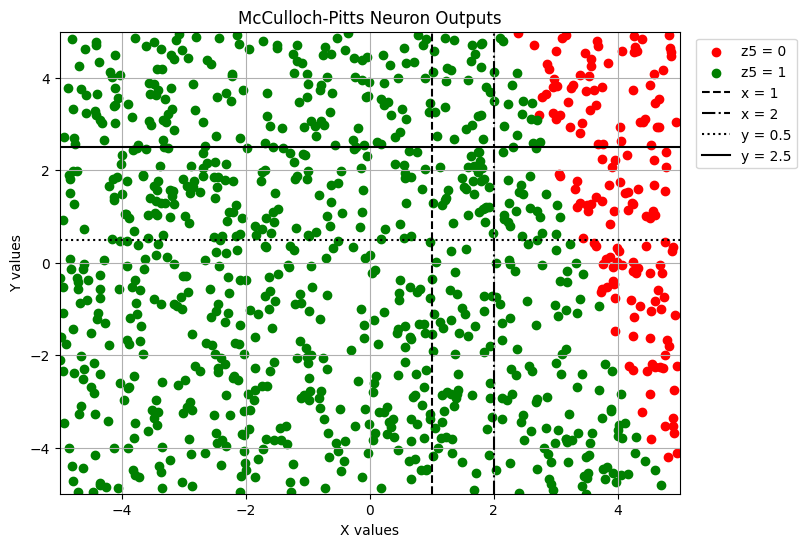

In [81]:
# Generate random data points
num_points = 1000
x_values = np.random.uniform(-5, 5, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-5, 5, num_points)  # Updated y-axis limits

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z5_value = Area(x_values[i], y_values[i])
    if z5_value == [0]:  # z5 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z5 value is 1
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z5 = 0')
plt.scatter(green_x, green_y, color='green', label='z5 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

# Plotting lines with legends
plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=2, color='black', linestyle='-.', label='x = 2')
plt.axhline(y=0.5, color='black', linestyle=':', label='y = 0.5')
plt.axhline(y=2.5, color='black', linestyle='-', label='y = 2.5')

plt.grid(True)

# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()

# Question 5:

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

In [99]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1KlxjtzbQDlBIdo82ckiunEwz8sqlAi0_

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1KlxjtzbQDlBIdo82ckiunEwz8sqlAi0_
To: /content/Admission_Predict.csv
100% 12.9k/12.9k [00:00<00:00, 35.9MB/s]


In [114]:
df = pd.read_csv('/content/Admission_Predict.csv')

print(df.head())

print(df.info())
df

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [121]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [116]:
corr_matrix = df.corr()
print(corr_matrix)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

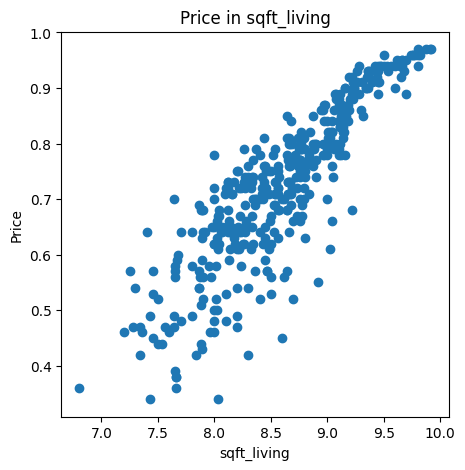

In [123]:
y = np.array(df['Chance of Admit '])
x = df['CGPA']

plt.figure(figsize = (5, 5))

plt.ylabel("Price")
plt.xlabel("sqft_living")

plt.title("Price in sqft_living")

plt.scatter(x,y)
plt.show()

In [115]:
df = df.drop(['Serial No.'], axis=1)

df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [119]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15 , shuffle = True, random_state = 93)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

scaler1 = MinMaxScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)

(400, 7) (400,)
(340, 7) (60, 7) (340,) (60,)


Model 1:

In [128]:
model1 = Sequential()

model1.add(Dense(30, activation='relu', input_shape=(x_train.shape[1],)))

model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
model1.compile( optimizer = 'adam', loss = 'mse')

history = model1.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=10)

Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 0.3347 - val_loss: 0.0763
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.0218
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0171
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0136
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.0119
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0110
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0103
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0100
Epoch 9/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0063 - val_loss: 0.0095
Epoch 10/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0093
Epoch 1

In [131]:
loss = model1.evaluate(x_test , y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.0058


In [133]:
from sklearn.metrics import r2_score

y_pred_1 = model1.predict(x_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

2/2 [==============================] - 0s 4ms/step


0.6301517842028432

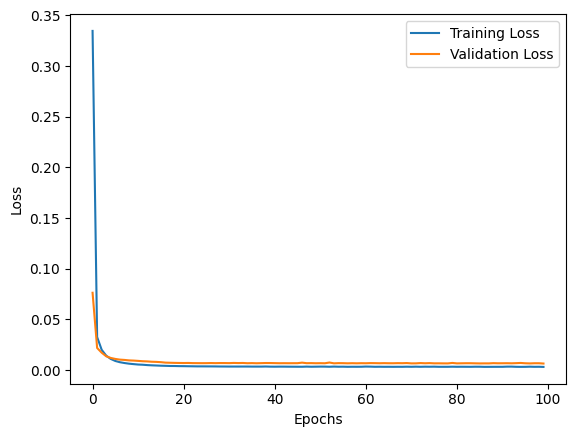

In [134]:
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()